# Diabetes 130- US Hospitals for years 1999-2008

*This code was developed by Luis Gavidia as part of Assesment to Globant Data Scientist Position*

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

The goal of this analysis is to evaluate whether the patient has ever been readmitted or not.

In [1]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import data 
df= pd.read_csv("diabetic_data.csv")
#df.head(15).T

## Data Preparation 
In this step it is necessary to observe the information and preprocess it. Thus, as a first step, descriptive statistics of the data will be performed. Subsequently, the information will be processed. The following points will be checked: Missing values, Outliers, Transformation and reduction of dimensionality (if necessary).

At first step is necessary to check if there are any duplicates in the sample.To achieve this, keys are used whose combinations should be unique for proper data preprocessing.

In [3]:
duplicates = df[df.duplicated(['encounter_id', 'patient_nbr'], keep=False)]
# Show Duplicates
print("Duplicados encontrados:")
print(duplicates)

Duplicados encontrados:
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]


As a Second step, we need to analyze the target variable, which includes the following categories: 
- If the patient was readmitted in less than 30 days ("<30")
- If the patient was readmitted in more than 30 days (">30")
- If there is no record ("NO")

Therefore, we will transform it into a dichotomous variable where 0 will indicate that the patient was never readmitted, while the rest will be assigned a value of 1, indicating that the patient was readmitted at least once

In [4]:
# Transform the target variable
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

porcentajes = df['readmitted'].value_counts(normalize=True) * 100
# Mostrar los porcentajes
print(porcentajes)


readmitted
0    53.911916
1    46.088084
Name: proportion, dtype: float64


### Missing Values 
As observed in the preceding section, upon comparing the information from this table with data available online, it became evident that many values are denoted by "?". This gives the appearance of completeness; however, these "?" actually signify missing values, albeit represented by a placeholder code. To address this issue, we will replace all "?" values with "NA" and subsequently conduct a sorting operation to identify variables that may present the most significant challenges in terms of the prevalence of these values. This will enable us to make informed decisions regarding the management of these missing data points.

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentages = (missing_counts / len(df)) * 100

# Create a DataFrame with the results
missing_data = pd.DataFrame({'Missing Counts': missing_counts, 'Missing Percentage (%)': missing_percentages})

# Sort by percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Missing Percentage (%)', ascending=False)

# Filter to exclude columns without missing values and keep 'race'
missing_data_executive = missing_data_sorted[missing_data_sorted['Missing Counts'] > 0]
print(missing_data_executive)

                   Missing Counts  Missing Percentage (%)
weight                      98569               96.858479
max_glu_serum               96420               94.746772
A1Cresult                   84748               83.277322
medical_specialty           49949               49.082208
payer_code                  40256               39.557416
race                         2273                2.233555
diag_3                       1423                1.398306
diag_2                        358                0.351787
diag_1                         21                0.020636


#### Analysis of Variables and Decisions
1. Variables *diag_3, diag_2, and diag_1*:

    **Description**: These variables represent the patient's previous diagnosis codes (ICD9), with 848 distinct values.
    
    **Reasoning**: Due to their categorical nature and high variability, imputation is not appropriate. Additionally, these variables are not crucial for the diabetes classification objective.
    
    **Decision**: It is decided to discard these variables from the analysis.
    
    
2. Variable *race*:

    **Description**: This variable could influence diabetes classification.
    
    **Reasoning**: Although the race variable has 2.23% missing values, its potential relevance justifies its inclusion.
    
    **Decision**: The missing values will be imputed using the mode (most frequent value), thus maintaining the integrity of the variable without introducing significant biases.
    

3. Variable *medical_specialty*:

    **Description**: Identifies the admitting physician's specialty.
    
    **Reasoning**: Since the model's objective is to classify the patient and not the physician's specialty, this variable does not provide relevant information for classification. Additionally, it has 49.08% missing values.
    
    **Decision**: It is decided to discard this variable from the analysis.
    
    
4. Variables *weight* and *max_glu_serum*:

    **Description**: These variables have a high percentage of missing values (96.86% and 94.75%, respectively).
    
    **Reasoning**: The high proportion of missing values makes imputation unreliable and could introduce significant biases in the model.
    
    **Decision**: It is decided to discard these variables from the analysis.
    
    

5. Variable *A1Cresult*:

    **Description**: Represents the result of the A1C test.
    
    **Reasoning**: With 83.28% missing values, imputation would be problematic and unreliable.
    
    **Decision**: It is decided to discard this variable from the analysis.
    

6. Variable *payer_code*:

    **Description**: Code of the service payer, with 23 distinct values (e.g., Blue Cross/Blue Shield, Medicare, self-pay).
    
    **Reasoning**: This variable does not have direct relevance in classifying the patient's diabetes status and, therefore, does not provide useful information for the model. Additionally, it has 39.56% missing values.
    
    **Decision**: It is decided to discard this variable from the analysis.

In [7]:
# Drop missing Columns and fullfil with mode

columns_with_missing = [col for col in df.columns[df.isnull().any()].tolist() if col != 'race']
print(columns_with_missing)

df = df.drop(columns=columns_with_missing)

mode_value = df['race'].mode()[0]
df['race'].fillna(mode_value, inplace=True)

['weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']


In analyzing the 'gender' variable, it has been observed that it includes values such as 'Unknown/Invalid'. These values may be treated as missing data. Consequently, it has been decided to remove these records from the sample. This decision is informed by the fact that variables like gender often possess significant discriminatory power in many analyses; hence, imputing values could diminish the robustness of the results.

In [8]:
percentages = df['gender'].value_counts(normalize=True) * 100
print(percentages)

df = df[df['gender'] != 'Unknown/Invalid']

gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: proportion, dtype: float64


Different types of medications are being applied. This is crucial; however, it is necessary to analyze their discriminative capacity. To do this, we will assess whether there are columns in the evidence that have identical values, which would need to be discarded. This is because it could lead to issues in estimation, and creating a single variable could pose problems as it could involve completely different medications.

In [9]:
# Initialize a list to store pairs of equal columns
equal_columns = []

# Compare each pair of columns
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            equal_columns.append((df.columns[i], df.columns[j]))

# Display pairs of exactly equal columns
print("Pairs of exactly equal columns:")
for pair in equal_columns:
    print(pair)


Pairs of exactly equal columns:
('examide', 'citoglipton')


In [10]:
columns_with_missing_2=['examide', 'citoglipton']
df = df.drop(columns=columns_with_missing_2)


In data science, categories with hierarchy denote categorical values that exhibit an inherent ordinal relationship, where higher values indicate more prominent characteristics or levels compared to lower ones. This hierarchical structure allows for meaningful ranking and comparison within the categories. On the other hand, categories without hierarchy refer to categorical values that lack a predefined order or ranking among them, representing distinct characteristics or attributes without a hierarchical sequence. Understanding whether categories possess hierarchy is crucial as it determines the appropriate analytical methods and interpretations applied to the data, influencing how relationships and insights are derived in analytical processes.

In [11]:
# Create a dictionary
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

# Replace age values with integers
df['age'] = df['age'].map(age_mapping)

# Sort the DataFrame by numerical age values (if necessary)
df = df.sort_values(by='age')

# Assign hierarchy to the 'age' column
df['age'] = pd.Categorical(df['age'], categories=sorted(age_mapping.values()), ordered=True)

# Count values after conversion and hierarchical assignment
age_counts = df['age'].value_counts().sort_index()
print("Count of values after conversion and hierarchical assignment:")
print(age_counts)


Count of values after conversion and hierarchical assignment:
age
1       161
2       691
3      1657
4      3775
5      9685
6     17256
7     22482
8     26066
9     17197
10     2793
Name: count, dtype: int64


Now, after reviewing the information provided on the internet, it is necessary to analyze the different medicines/drugs administered to the patients. For this, we will evaluate the quantity administered to each of them.

In [12]:
keys =['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    colname = str(col)
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [13]:
df_aux = df[keys + ['readmitted']].copy()
percentage_table = pd.DataFrame()

# Initialize a DataFrame to store the results
count_table = pd.DataFrame()

# Calculate the counts for each column in relation to 'readmitted'
for col in keys:
    # Create a contingency table to count the combinations
    contingency_table = pd.crosstab(df_aux['readmitted'], df_aux[col])
    
    # Ensure both columns (0 and 1) are present
    for value in [0, 1]:
        if value not in contingency_table.columns:
            contingency_table[value] = 0
    
    # Sort the columns to ensure they are in the correct order
    contingency_table = contingency_table[[0, 1]]
    
    # Rename the columns for clarity
    contingency_table.columns = [f'{col}_0', f'{col}_1']
    
    # Concatenate the results to count_table
    count_table = pd.concat([count_table, contingency_table], axis=1)

# Rename the index of the count table for clarity
count_table.index = ['readmitted_0', 'readmitted_1']

# Display the count table
print("Count table of each value in relation to readmitted:")
print(count_table.T)

Count table of each value in relation to readmitted:
                            readmitted_0  readmitted_1
metformin_0                        53913         46208
metformin_1                          948           694
repaglinide_0                      54781         46827
repaglinide_1                         80            75
nateglinide_0                      54842         46886
nateglinide_1                         19            16
chlorpropamide_0                   54859         46897
chlorpropamide_1                       2             5
glimepiride_0                      54572         46670
glimepiride_1                        289           232
glipizide_0                        54212         46221
glipizide_1                          649           681
glyburide_0                        54119         46268
glyburide_1                          742           634
pioglitazone_0                     54693         46718
pioglitazone_1                       168           184
rosiglitazon

As we can see, the majority of the data is scored at 0, while the few values that are scored at 1 do not provide a good indicator for separating the samples if we consider using them as a classification axis. Insulin, on the other hand, may offer some additional analysis due to its significant population scored at 1. Thus, if patients have not received a pill in their treatment, it becomes marginal to the solution of the case, and we will focus solely on insulin.

In [14]:
# Eliminates all except insuline
keys.remove('insulin')
df = df.drop(columns=keys)
df.shape


(101763, 20)

IDs should not be considered in the classification as they merely provide the uniqueness of the record, but do not offer any explanatory power.

In [15]:
df = df.drop(columns=['encounter_id','patient_nbr'])

df.shape

(101763, 18)

In [16]:
df.head(10).T

,0,2935,22376,2936,2962,216,11373,3054,22623,80354
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic
gender,Female,Male,Male,Male,Male,Female,Male,Male,Female,Female
age,1,1,1,1,1,1,1,1,1,1
admission_type_id,6,3,1,2,1,6,1,1,1,4
discharge_disposition_id,25,1,1,1,1,25,1,1,1,1
admission_source_id,1,1,7,4,7,7,7,7,7,1
time_in_hospital,1,8,4,6,3,3,2,3,3,2
num_lab_procedures,41,39,58,22,47,34,48,47,49,27
num_procedures,0,3,0,0,0,0,0,0,0,0
num_medications,1,19,7,10,4,4,3,9,3,2


In the case of admission_type_id, the values 4, 5, 6, and 7 will be removed because they present null values or are not relevant to the target variable.

In [17]:
conteo_por_grupo = df.groupby('admission_type_id')['admission_type_id'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)

valores_a_eliminar = [4, 5, 6, 8]

df_filtrado = df[~df['admission_type_id'].isin(valores_a_eliminar)]

# Filtered Data
print("\nDataFrame filtrado:")
print(df_filtrado)

admission_type_id
1    53.052681
2    18.159842
3    18.541120
4     0.009827
5     4.702102
6     5.199336
7     0.020636
8     0.314456
Name: admission_type_id, dtype: float64

DataFrame filtrado:
                  race  gender age  admission_type_id  \
2935   AfricanAmerican    Male   1                  3   
22376        Caucasian    Male   1                  1   
2936         Caucasian    Male   1                  2   
2962         Caucasian    Male   1                  1   
11373        Caucasian    Male   1                  1   
...                ...     ...  ..                ...   
79775        Caucasian  Female  10                  2   
5419         Caucasian    Male  10                  2   
57094        Caucasian    Male  10                  1   
57063        Caucasian  Female  10                  3   
43562  AfricanAmerican  Female  10                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
2935                          1           

In [18]:
# Recode the 'admission_source' column based on the given conditions
df['admission_source_id'] = df['admission_source_id'].apply(lambda x: 
    'Physician Referral' if x in ["1", "2", "3"] else
    'Other' if x in ["4", "5", "6", "8", "9", "10", "11", "12", "13", "14", "15", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26"] else
    'Emergency Room'
)

# Convert the 'admission_source' column to a categorical type
df['admission_source_id'] =df['admission_source_id'].astype('category')

In the case of the variable "discharged to home," we will transform it to indicate whether the patient goes home or not

In [19]:
mapped_discharge = {
    1: "Discharged to Home",
    6: "Discharged to Home",
    8: "Discharged to Home",
    13: "Discharged to Home",
    19: "Discharged to Home",
    18: np.nan,
    25: np.nan,
    26: np.nan,
    2: "Other",
    3: "Other",
    4: "Other",
    5: "Other",
    7: "Other",
    9: "Other",
    10: "Other",
    11: "Other",
    12: "Other",
    14: "Other",
    15: "Other",
    16: "Other",
    17: "Other",
    20: "Other",
    21: "Other",
    22: "Other",
    23: "Other",
    24: "Other",
    27: "Other",
    28: "Other",
    29: "Other",
    30: "Other"
}

# Apply the mapping to the 'discharge_disposition_id' column
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

# Display the modified DataFrame
df.head(15).T

,0,2935,22376,2936,2962,216,11373,3054,22623,80354,22751,89636,3153,89538,11200
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic,Caucasian,Caucasian,Hispanic,Caucasian,Caucasian
gender,Female,Male,Male,Male,Male,Female,Male,Male,Female,Female,Male,Male,Female,Male,Male
age,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
admission_type_id,6,3,1,2,1,6,1,1,1,4,1,1,1,3,1
discharge_disposition_id,NaN,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,NaN,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,1,8,4,6,3,3,2,3,3,2,1,2,3,2,2
num_lab_procedures,41,39,58,22,47,34,48,47,49,27,31,58,36,1,47
num_procedures,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
num_medications,1,19,7,10,4,4,3,9,3,2,5,8,6,3,6


Given that there are few values of 10 or more, it has been decided to truncate the days of care to 10.

In [20]:
df['time_in_hospital'] = df['time_in_hospital'].clip(upper=10)


In [21]:
conteo_por_grupo = df.groupby('time_in_hospital')['time_in_hospital'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)

df['time_in_hospital'] = pd.Categorical(df['time_in_hospital'], categories=sorted(age_mapping.values()), ordered=True)


time_in_hospital
1     13.959887
2     16.925602
3     17.448385
4     13.682773
5      9.793343
6      7.408390
7      5.757495
8      4.313945
9      2.949992
10     7.760188
Name: time_in_hospital, dtype: float64


In [22]:
conteo_por_grupo = df.groupby('number_inpatient')['number_inpatient'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)

df['number_inpatient'] = df['number_inpatient'].clip(upper=1)

print()

number_inpatient
0     66.455391
1     19.182807
2      7.434922
3      3.351906
4      1.593900
5      0.797932
6      0.471684
7      0.263357
8      0.148384
9      0.109077
10     0.059943
11     0.048151
12     0.033411
13     0.019654
14     0.009827
15     0.008844
16     0.005896
17     0.000983
18     0.000983
19     0.001965
21     0.000983
Name: number_inpatient, dtype: float64



In [23]:
conteo_por_grupo = df.groupby('number_outpatient')['number_outpatient'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)
df['number_outpatient'] = df['number_outpatient'].clip(upper=1)

print()


number_outpatient
0     83.550996
1      8.398927
2      3.531736
3      2.006623
4      1.079960
5      0.523766
6      0.297751
7      0.152315
8      0.096302
9      0.081562
10     0.056012
11     0.041272
12     0.029480
13     0.030463
14     0.027515
15     0.019654
16     0.014740
17     0.007861
18     0.004913
19     0.002948
20     0.006879
21     0.006879
22     0.004913
23     0.001965
24     0.002948
25     0.001965
26     0.001965
27     0.002948
28     0.000983
29     0.001965
33     0.001965
34     0.000983
35     0.001965
36     0.001965
37     0.000983
38     0.000983
39     0.000983
40     0.000983
42     0.000983
Name: number_outpatient, dtype: float64



In [24]:
conteo_por_grupo = df.groupby('number_emergency')['number_emergency'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)

number_emergency
0     88.814206
1      7.543999
2      2.006623
3      0.712440
4      0.367521
5      0.188674
6      0.092371
7      0.071735
8      0.049134
9      0.032428
10     0.033411
11     0.022602
12     0.009827
13     0.011792
14     0.002948
15     0.002948
16     0.004913
18     0.004913
19     0.003931
20     0.003931
21     0.001965
22     0.005896
24     0.000983
25     0.001965
28     0.000983
29     0.000983
37     0.000983
42     0.000983
46     0.000983
54     0.000983
63     0.000983
64     0.000983
76     0.000983
Name: number_emergency, dtype: float64


In [25]:
df['diabetesMed'] = df['diabetesMed'].replace({'Yes': 1, 'No': 0})
df['change'] = df['change'].replace({'Yes': 1, 'No': 0})

Finally, we stablish a categorical variable for ones that start with numbers:

In [26]:
conteo_por_grupo = df.groupby('num_medications')['num_medications'].count()
porcentaje_por_grupo = (conteo_por_grupo / df.shape[0]) * 100
print(porcentaje_por_grupo)

num_medications
1     0.257461
2     0.461857
3     0.884408
4     1.392451
5     1.982056
        ...   
72    0.002948
74    0.000983
75    0.001965
79    0.000983
81    0.000983
Name: num_medications, Length: 75, dtype: float64


In [27]:
df.dtypes


race                          object
gender                        object
age                         category
admission_type_id              int64
discharge_disposition_id      object
admission_source_id         category
time_in_hospital            category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
insulin                        int64
change                        object
diabetesMed                    int64
readmitted                     int64
dtype: object

In [28]:
df.shape

(101763, 18)

In [29]:
df.head(10).T


,0,2935,22376,2936,2962,216,11373,3054,22623,80354
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic
gender,Female,Male,Male,Male,Male,Female,Male,Male,Female,Female
age,1,1,1,1,1,1,1,1,1,1
admission_type_id,6,3,1,2,1,6,1,1,1,4
discharge_disposition_id,NaN,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,NaN,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,1,8,4,6,3,3,2,3,3,2
num_lab_procedures,41,39,58,22,47,34,48,47,49,27
num_procedures,0,3,0,0,0,0,0,0,0,0
num_medications,1,19,7,10,4,4,3,9,3,2


In [30]:
df = df.dropna()

In [31]:
df.head(10).T

,2935,22376,2936,2962,11373,3054,22623,80354,22751,89636
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic,Caucasian,Caucasian
gender,Male,Male,Male,Male,Male,Male,Female,Female,Male,Male
age,1,1,1,1,1,1,1,1,1,1
admission_type_id,3,1,2,1,1,1,1,4,1,1
discharge_disposition_id,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,8,4,6,3,2,3,3,2,1,2
num_lab_procedures,39,58,22,47,48,47,49,27,31,58
num_procedures,3,0,0,0,0,0,0,0,0,0
num_medications,19,7,10,4,3,9,3,2,5,8


In [32]:
col2=['num_lab_procedures','num_medications']

for col in col2:
    df[col + '_quintile'] = pd.qcut(df[col], 5, labels=[1, 2, 3, 4, 5])



In [33]:
df.head(10).T

,2935,22376,2936,2962,11373,3054,22623,80354,22751,89636
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic,Caucasian,Caucasian
gender,Male,Male,Male,Male,Male,Male,Female,Female,Male,Male
age,1,1,1,1,1,1,1,1,1,1
admission_type_id,3,1,2,1,1,1,1,4,1,1
discharge_disposition_id,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,8,4,6,3,2,3,3,2,1,2
num_lab_procedures,39,58,22,47,48,47,49,27,31,58
num_procedures,3,0,0,0,0,0,0,0,0,0
num_medications,19,7,10,4,3,9,3,2,5,8


The variable num_procedures will be dropped because is concentrated in just one value, so is not useful as discriminator.

In [34]:
df = df.drop(['num_lab_procedures', 'num_medications','num_procedures'], axis=1)

In [35]:
df.head(10).T

,2935,22376,2936,2962,11373,3054,22623,80354,22751,89636
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Hispanic,Caucasian,Caucasian
gender,Male,Male,Male,Male,Male,Male,Female,Female,Male,Male
age,1,1,1,1,1,1,1,1,1,1
admission_type_id,3,1,2,1,1,1,1,4,1,1
discharge_disposition_id,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,8,4,6,3,2,3,3,2,1,2
number_outpatient,0,0,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0
number_inpatient,0,0,0,0,0,0,0,0,0,0


In [36]:
# Crear dummies para todas las columnas excepto la variable objetivo, excluyendo la categoría base
df2 = pd.get_dummies(df.drop('readmitted', axis=1), drop_first=True)
df2['readmitted'] = df['readmitted']  # Añadir la variable objetivo de nuevo al DataFrame
df2.head().T

,2935,22376,2936,2962,11373
admission_type_id,3,1,2,1,1
number_outpatient,0,0,0,0,0
number_emergency,0,0,0,0,0
number_inpatient,0,0,0,0,0
number_diagnoses,9,1,3,3,1
insulin,0,0,0,0,0
diabetesMed,0,1,1,0,1
race_Asian,False,False,False,False,False
race_Caucasian,False,True,True,True,True
race_Hispanic,False,False,False,False,False


## Etapa de Modelamiento

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df2.head().T

,2935,22376,2936,2962,11373
admission_type_id,3,1,2,1,1
number_outpatient,0,0,0,0,0
number_emergency,0,0,0,0,0
number_inpatient,0,0,0,0,0
number_diagnoses,9,1,3,3,1
insulin,0,0,0,0,0
diabetesMed,0,1,1,0,1
race_Asian,False,False,False,False,False
race_Caucasian,False,True,True,True,True
race_Hispanic,False,False,False,False,False


In [39]:
X = df2.drop('readmitted',axis=1)
y = df2['readmitted']


In [40]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Define parameter grids for each classifier
param_grids = {
    'logit': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']
    },
    'decision_tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'xgboost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'lightgbm': {
        'n_estimators': [50, 100, 200],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }
}

In [42]:
# Initialize classifiers
classifiers = {
    'logit': LogisticRegression(max_iter=10000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgboost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'lightgbm': lgb.LGBMClassifier()
}

In [43]:
# GridSearchCV and cross-validation
best_estimators = {}
for clf_name, clf in classifiers.items():
    print(f"Optimizing {clf_name}...")
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")


Optimizing logit...
Best parameters for logit: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.6193825034562004
Optimizing decision_tree...
Best parameters for decision_tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.6131875357307438
Optimizing random_forest...
Best parameters for random_forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.6253715250315609
Optimizing xgboost...


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for xgboost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.6271519992824943
Optimizing lightgbm...
[LightGBM] [Info] Number of positive: 31429, number of negative: 36529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 67958, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.462477 -> initscore=-0.150375
[LightGBM] [Info] Start training from score -0.150375
Best parameters for lightgbm: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 50, 'num_leaves': 31}
Best cross-validation score: 0.6258129503437881


In [48]:
# Evaluate the best models on the test set
results = {}
for name, clf in best_estimators.items():
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': cr,
        'ROC Curve': (fpr, tpr, roc_auc)
    }


In [49]:
# Display results
for name, result in results.items():
    print(f"Classifier: {name}\n")
    print(f"Accuracy: {result['Accuracy']}\n")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")
    print(f"Classification Report:\n{result['Classification Report']}\n")
    print(f"ROC AUC: {result['ROC Curve'][2]}\n")
    print("-" * 80)



Classifier: logit

Accuracy: 0.617304721030043

Confusion Matrix:
[[11572  4034]
 [ 7112  6407]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67     15606
           1       0.61      0.47      0.53     13519

    accuracy                           0.62     29125
   macro avg       0.62      0.61      0.60     29125
weighted avg       0.62      0.62      0.61     29125


ROC AUC: 0.6520579155179542

--------------------------------------------------------------------------------
Classifier: decision_tree

Accuracy: 0.6096824034334763

Confusion Matrix:
[[11654  3952]
 [ 7416  6103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     15606
           1       0.61      0.45      0.52     13519

    accuracy                           0.61     29125
   macro avg       0.61      0.60      0.59     29125
weighted avg       0.61      0.61      

In [54]:
# Visualize the results
accuracies = [result['Accuracy'] for result in results.values()]
roc_aucs = [result['ROC Curve'][2] for result in results.values()]
clf_names = list(results.keys())

In [56]:
print(accuracies)

[0.617304721030043, 0.6096824034334763, 0.6208412017167382, 0.6235536480686695, 0.6226952789699571]


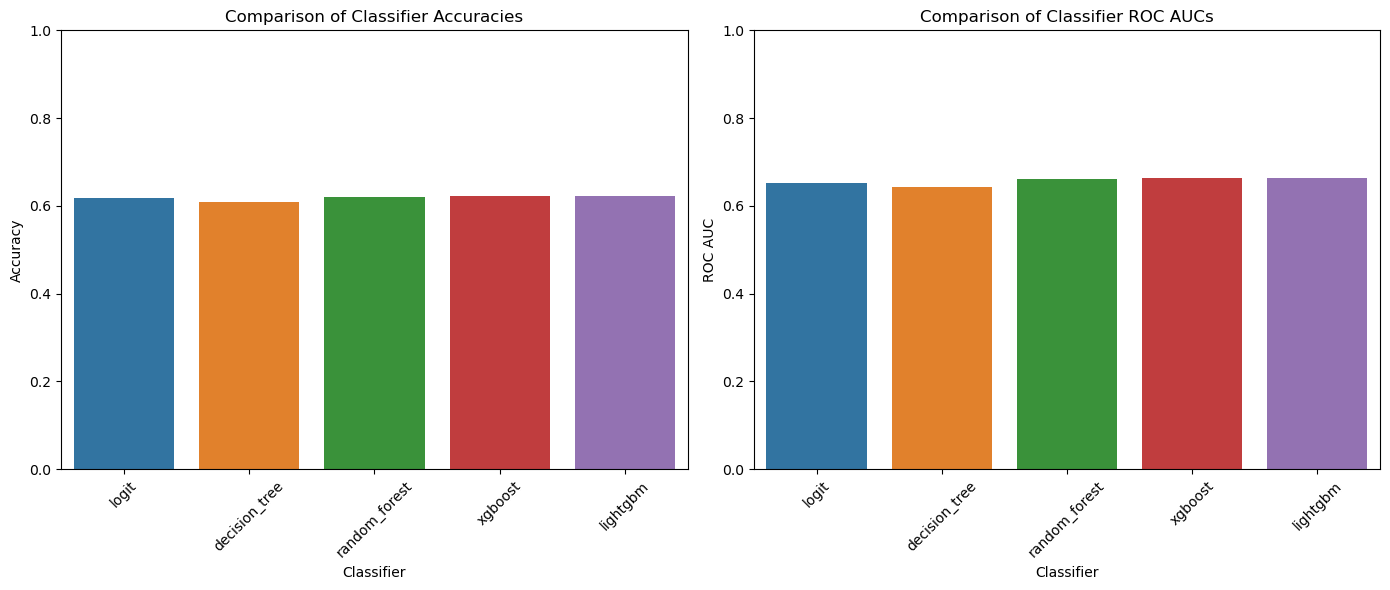

In [58]:
# Plot Accuracy and ROC AUC
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=clf_names, y=accuracies)
plt.title('Comparison of Classifier Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=clf_names, y=roc_aucs)
plt.title('Comparison of Classifier ROC AUCs')
plt.ylabel('ROC AUC')
plt.xlabel('Classifier')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

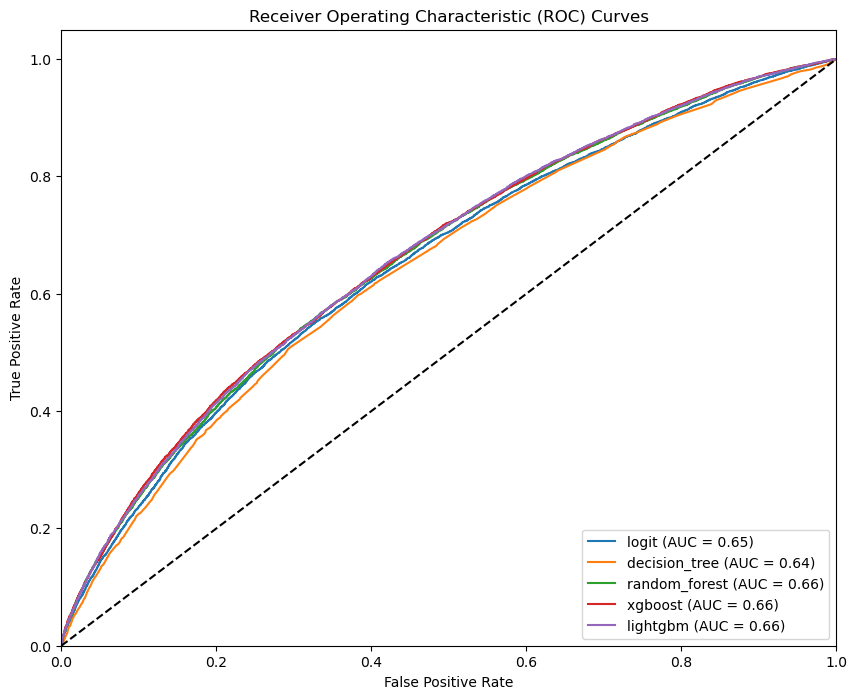

In [52]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, roc_auc = result['ROC Curve']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

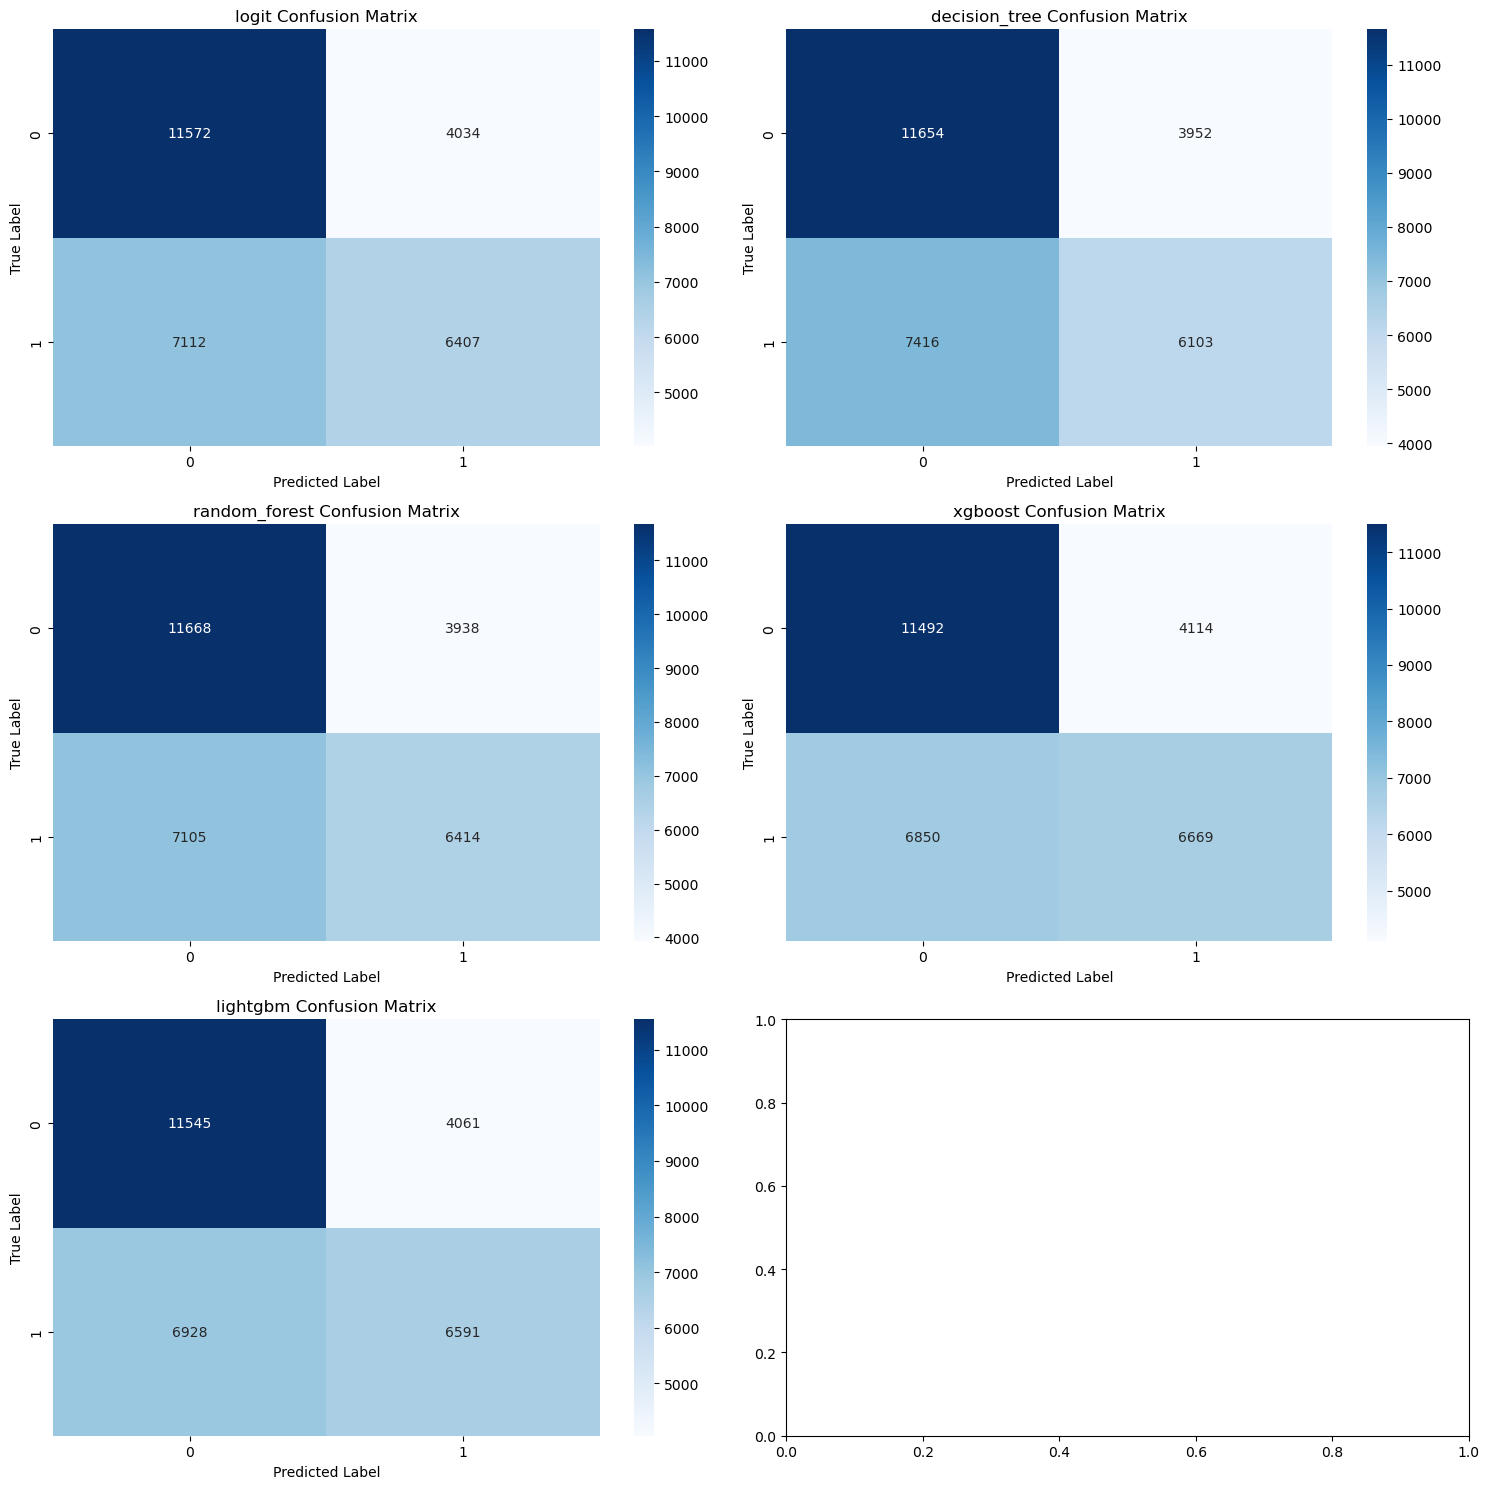

In [53]:
# Plot Confusion Matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = result['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()